<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/MLA3_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 3
# Adam Winders 
# CS430-ON 
# Machine Learning in the Cloud

<br>
<br>
<br>

## Standard Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
Imports for both SVC and SVR

In [3]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# Line Plots

Plots straight line on a plot

In [7]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

Draws the plot margins similar to the book

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Plots linear sample for example purposes

In [9]:
X = np.linspace(-10, 10, num=10)
y = X
outcome = [1,1,1,1,1,0,0,0,0,0]
data = np.concatenate((X.reshape(10,1), y.reshape(10,1)), axis=1)
df = pd.DataFrame(data)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df['outcome'] = outcome

# ROC_Curve Function
This function is for plotting the roc_curve

In [10]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

# Problem 1

### Acquire Data

In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/banknote_authentication.csv')

### Statistical and Visual Exploration

Summarizes numerical columns of data

In [12]:
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Gets the count of forgery vs. no forgery, and saves into a data frame

In [13]:
df.forgery

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: forgery, Length: 1372, dtype: int64

In [14]:
forgery_type= df['forgery'].groupby(df['forgery']).count()

In [15]:
forgery_type

forgery
0    762
1    610
Name: forgery, dtype: int64

Creates barplot to view how many banknotes are forgeries and how many are not. Size of the plot is 10x5

<Axes: title={'center': 'Forged vs. Not Forged'}, xlabel='forgery'>

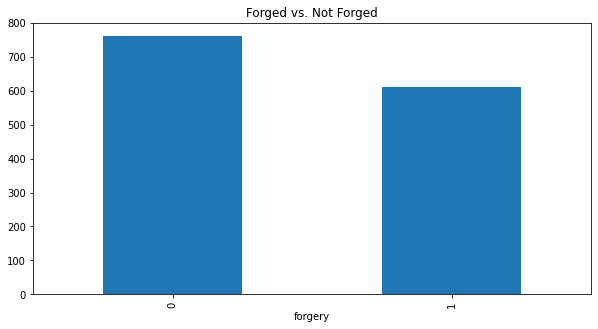

In [16]:
forgery_type.plot(kind='bar', figsize=(10,5), title='Forged vs. Not Forged')

Creates pairplot of all numerical variables using Seaborn

In [29]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


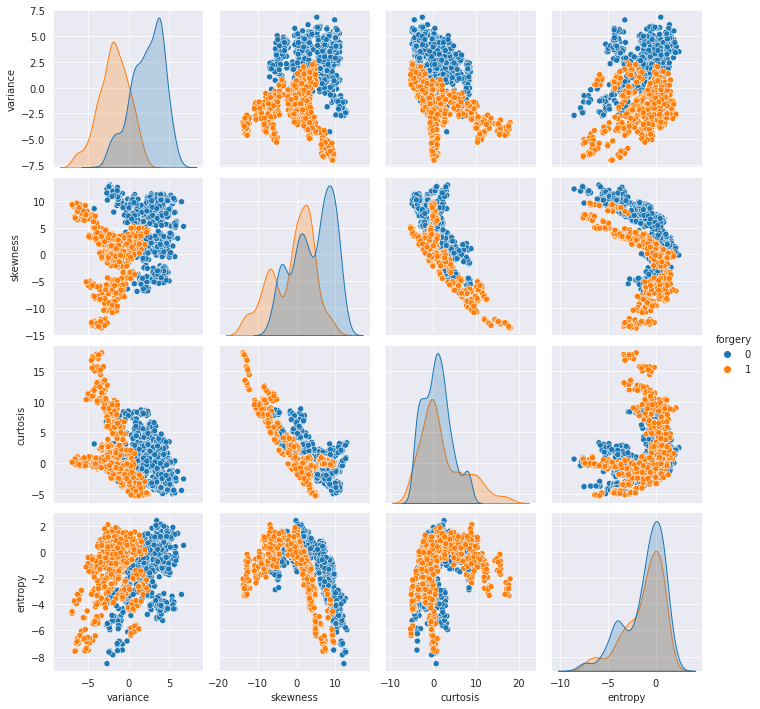

In [47]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/banknote_authentication.csv')
sns.pairplot(df, hue ='forgery')
# sns.set(style="ticks", color_codes=True) sns.pairplot(df)

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.

# Problem 2

### Acquire Data

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.